# Maximum Likelihood Estimation (MLE)

## Objectives

You will be able to:

- Describe the process of parameter inference 
- Define likelihood and compare it to probability 
- List the two assumptions of Maximum Likelihood Estimation 
- Describe how Maximum Likelihood Estimation is related to parameter estimation 

## Parameter Inference

Parameter Inference is the process of probabilistically inferring parameter(s) for a model of our choice, that is which parameter values best describe the underlying dataset, used in an analytical context. 

Let's try to understand this with a simple experiment with a 10 times coin flip and inspecting the outcome. 

In [6]:
import random
def coinToss():
    number = int(input("Number of times to flip coin: "))
    recordList = []
    heads = 0
    tails = 0
    for amount in range(number):
         flip = random.randint(0, 1)
         if (flip == 0):
              print("Toss", amount+1 ,':' , "Heads")
              recordList.append("Heads")
         else:
              print("Toss", amount+1 ,':' , "Tails")
              recordList.append("Tails")
    print(str(recordList))
    print(str(recordList.count("Heads")) + str(recordList.count("Tails")))
    return recordList

In [7]:
#lst = coinToss()
# Not able to have an imput

Remember its a random experiment so the output will change everytime you run it. Here is the output sequence we'll use in this lesson: 
```
['Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads']
```
Considering its a random experiment, you can say that there has to be *some* underlying parameter for the outcome of a coin flip. Also, consider other random experiments with dice rolls. Can you identify a parameter that determines the outcome of such experiments? 

Parameter Inference is all to do with identifying that parameter with its optimal value. The first key step in this process is Maximum Likelihood Estimation (MLE).



## Maximum Likelihood Estimation

MLE primarily deals with **determining the parameters** that **maximize the probability of the data**. Such a determination can help you predict the outcome of future experiments, e.g., if we toss the coin 1 more time, what is the probability of seeing a head? 

* It's a fair coin so the probability is 0.5  

This is a safe assumption as it assumes independence between coin flips and hence past events have no impact on future ones. 

In [1]:
#p_head = lst.count('Heads')/10
p_head = 0.53

You want to know the probability of 11th flip $ p_{11}(f_{11})$, being a head so you can write:

> $p_{11}(f_{11}= \text{Heads})$

You can also write above for calculating the probability of $ith$ flip being a head:

> $p_i(f_i = \text{Heads}) = \theta_i$

Here $\theta_i$ is the parameter that governs the outcome of _ith_ flip. 

To signify that the probability distribution depends on $\theta_i$, you can use conditioning as you saw earlier and write down the last equation to show the probability distribution function along with its dependence on theta_i.

> $p_i((f_i = Heads) | \theta_i)$

*The probability of seeing heads in the ith flip , given theta_i*

If the data depends on theta parameter, then the first ten coin flips f_1 to f_10 depend on theta_1 to theta_10  for i = 1 to 10. So looking at the outcome of first ten experiments, how can we extrapolate it to theta_11? 

ANSWER - if you say that random outcome of a sequence of flips is governed (or modeled) by the parameters theta_1 to theta_10, you can calculate the probability function based on observed data as:

> $P (Heads, Heads, Tails, Tails, Tails, Heads, Tails, Heads, Heads, Heads) | \theta_{1}\theta_{2} .. \theta_{10})$

This is where Maximum Likelihood Estimation steps into the equation. The problem you have now is that you need to find values of thetas 1 to 10.  MLE helps find theta_i’s such that that probability function shown above is **as high as possible** and this is the basic principle of MLE.

#### Likelihood - The probability of data

MLE looks at the probability of data and it tries to find those parameters (i.e. theta_1 through theta_10 in above case) that maximize the likelihood of this sequence occurring. 

> With maximum liklihood estimation, we want to choose those parameters under which our observations become most **likely**.

Going back to our coin flip example. If in our understanding, the coin flips do not affect each other, i.e., they are independent (the outcome of first flip does not affect the outcome of the second flip):
>$P (H, H, T, T, T, H, T, H, H, H) | \theta_{1}\theta_{2} .. \theta_{10})$

>$= P(F_1 = H | \theta_1).P(F_2 = H | \theta_2) .. P(F_{10} = H | \theta_{10})$

>$= \prod_{i=1}^{10} p_i(F_i = f_i | \theta_i)$ - The general case for coin flip

Note: $\prod$ signifies the product over a series, shown in the previous equation, just as $\Sigma$ denotes summation over a series.

### MLE assumptions
1. The **independence assumption** allows you to simplify the complex likelihood term into ten simpler factors that can be shown through a general notation in the last equation. 

The independence assumption allows simplification of the likelihood term but you still don’t have theta_11 in the equation.

2. **The flips are quantitatively same, i.e., they are identically distributed**. 

This implies that the flips are taking place under similar circumstances, you can assume that the parameter governing the flips is one and same i.e. just the $\theta$ without any subscripts. Based on this assumption, you can rewrite above equation as :

>$\prod_{i=1}^{10} p_i(F_i = f_i | \theta_i) = \prod_{i=1}^{10} p(F_i = f_i | \theta) $

This assumption leads you to believe that the 10 flips are governed by the same parameter theta. You now have just one parameter governing the entire sequence of coin flips, and that includes the 11th flip as well. 

This is how MLE allows you to connect first 10 coin flips to the 11th coin flip and is the key for inference.

> The two assumptions you made are used so often in Machine Learning that they have a special name together as an entity : "The i.i.d. assumption" i.e. Independent and Identically distributed samples.

This means that the 10 flips are independent and identically distributed which is great as it will allow you to explicitly write down the likelihood that you are trying to optimize. 

Remember that theta was defined as the probability of the flip showing up heads; the probability of the sequence w.r.t. theta can now be formulated as:

$ \prod_{i=1}^{10} p(F_i = f_i | \theta)$ 

$= \theta \theta (1-\theta)(1-\theta)(1-\theta) \theta(1-\theta)\theta\theta\theta$

$=\theta^6(1-\theta)^4$

* theta = Probability of seeing a head
* 1 - theta = Probability of seeing a tail
* The sequence:  H, H, T, T, T, H, T, H, H, H

You see here the i.i.d. assumptions simplifies  the likelihood function to a simple polynomial; to a point where you can **start optimizing the function for the parameter theta**.

This simplified polynomial expression can be interpreted as a function of theta i.e., 
> $f(\theta)$ 

Now you want to find out the maxima (maximum likelihood) of this function. 

\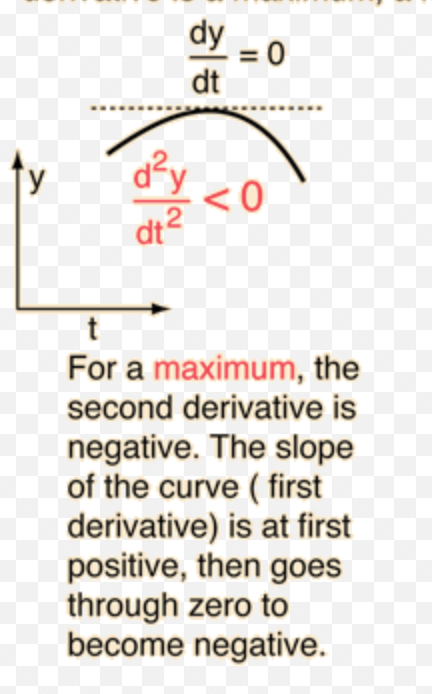

Following the intuition in the image above, you can achieve this theta by taking the derivative 

> $\frac{df}{d(\theta)}$ 

Set this  zero, and solve for theta. Then verify the critical point i.e. maxima, by inserting it into the second derivative of $f(\theta)$. This is a simple approach, however, the application of product rule repeatedly in this process could be a technically challenging process. This calculation can be simplified using a monotonic function. 

> In mathematics, a [monotonic function](https://en.wikipedia.org/wiki/Monotonic_function) (or monotone function) is a function between ordered sets that preserves or reverses the given order. This concept first arose in calculus, and was later generalized to the more abstract setting of order theory. 


According to this theory, if you apply a monotonic function to another function, like the one you are trying to optimize above, this application will preserve the critical points (maxima in this case) of the original function. Logarithmic functions are normally used within the domain of machine learning to achieve the functionality of monotonicity. The logarithmic function is described as:

> $log_b(x)$

* where b is any number such that b > 0, b ≠ 1, and x > 0  
* The function is read "log base b of x" 

The logarithm y is the exponent to which b must be raised to get x. The behavior of a log function can be understood from following image.


<img src="images/new_log.png" width="700">


This helps you realize that **log of f(θ) i.e. log(f(θ)) will have the save maxima as the likelihood function f(θ).** This is better known as the **log likelihood**. 

Thus, the optimization function i.e. $\theta^6(1-\theta)^4$ , that you're trying to optimize w.r.t. theta can be written down as:

> $\underset{\theta}{\operatorname{argmax}} \theta^6(1-\theta)^4$

> In mathematics, the arguments of the maxima (abbreviated arg max or argmax) are the points of the domain of some function at which the function values are maximized. 

Remember that you are not concerned with the actual maximum value of the function. You want to **learn the value for theta** where the **function has the maximum value**.

Following the monotonicity principle, the argmax function can be written with natural log *ln* as:

> $\underset{\theta}{\operatorname{argmax}} ln(\theta^6(1-\theta)^4)$
 
> $=\underset{\theta}{\operatorname{argmax}} 6 (ln (\theta)) + 4 (ln(1-\theta))$

Let's call our log likelihood function $g(\theta)$, take its derivative and set it to zero. 

> $ \frac{d}{d\theta}[g(\theta)] = |H|\frac{1}{\theta} + |T|\frac{1}{1-\theta}(-1)$

|T| are the number of tails = 4 
|H| are the number of heads = 6 

You are simply solving for a general case here , so use |T| and |H|

> $|H|\frac{1}{\theta} + {|T|}\frac{1}{1-\theta}(-1) = 0 $

> $|H|(1-\theta) - |T|\theta = 0$

> $\theta = \frac{|H|}{|H|+ |T|}$

This is the Maximum Likelihood Function $\theta_MLE$ for any given sequence of coins. 

$$\theta_{MLE} = \frac{|H|}{|H|+ |T|}$$

For the initial problem, where H = 6  and T = 4, you get MLE for theta as 6/10 = 0.6 , or , 60% chance of seeing a head for the 11th coin given the data from first 10 coin flips. 

> This maximum is called the **MLE for theta** as it makes the observed sequence **most likely**.

## Limitations of MLE
Consider a scenario where you get this sequence by total chance: [T, T, T, T, T].
- According to the derived MLE formula, the probability of seeing a head at 6th coin toss would be zero. This demonstrates how MLE heavily depends on past data to find the likelihood function.

It also indicates that MLE is only a first step for parameter estimation.